# Cohort Analysis

### Importing data

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processed_data/cleaned_df.csv')

,customer_id,date,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
...,...,...,...,...
69654,23568,1997-04-05,4,83.74
69655,23568,1997-04-22,1,14.99
69656,23569,1997-03-25,2,25.74
69657,23570,1997-03-25,3,51.12


In [17]:
df['date'] = pd.to_datetime(df['date'])

### Making sure we have only the first purchase date for each customer

In [49]:
df_first_purchase = df.sort_values(['customer_id', 'date']).groupby('customer_id').first().reset_index()
df_first_purchase.head()

,customer_id,date,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,3,1997-01-02,2,20.76
3,4,1997-01-01,2,29.33
4,5,1997-01-01,2,29.33


In [19]:
print('First purchase date -> ', df['date'].min())
print('Last purchase date -> ', df['date'].max())

First purchase date ->  1997-01-01 00:00:00
Last purchase date ->  1998-06-30 00:00:00


### Visualizing all purchases within cohort

In [52]:
price_per_date = df_first_purchase.groupby('date')['price'].sum()
price_per_date = price_per_date.reset_index()

In [53]:
price_per_date

,date,price
0,1997-01-01,7420.90
1,1997-01-02,7921.89
2,1997-01-03,7134.26
3,1997-01-04,6528.12
4,1997-01-05,9113.32
...,...,...
79,1997-03-21,7144.46
80,1997-03-22,8559.14
81,1997-03-23,9582.57
82,1997-03-24,9221.45


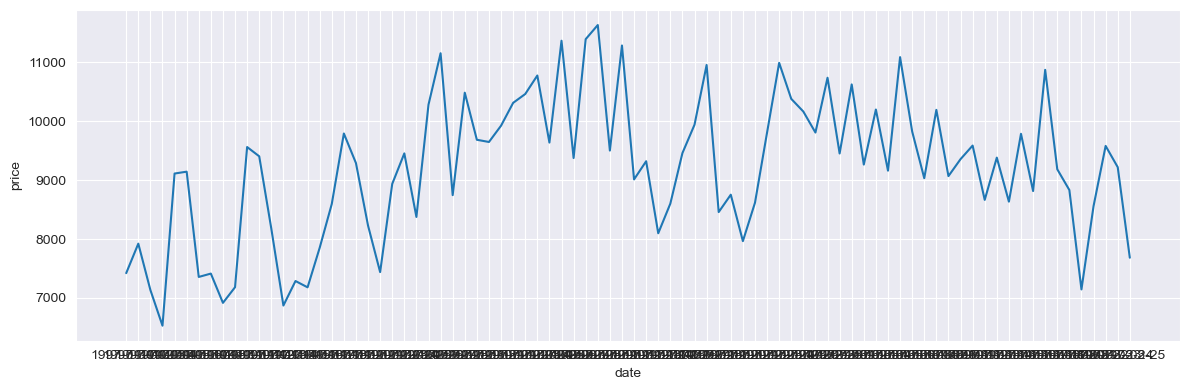

In [72]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=price_per_date, x='date', y='price')
plt.tight_layout()
plt.show()

### Visualizing Customer Purchases

In [69]:
idx = df_first_purchase['customer_id'].unique()

In [70]:
cost_subset_df = df_first_purchase[df_first_purchase['customer_id'].isin(idx_selected)] \
                  .groupby(['customer_id', 'date']).sum().reset_index()
cost_subset_df

,customer_id,date,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,3,1997-01-02,2,20.76
3,4,1997-01-01,2,29.33
4,5,1997-01-01,2,29.33
5,6,1997-01-01,1,20.99
6,7,1997-01-01,2,28.74
7,8,1997-01-01,1,9.77
8,9,1997-01-01,2,23.54
9,10,1997-01-21,3,39.31


<Axes: xlabel='date', ylabel='quantity'>

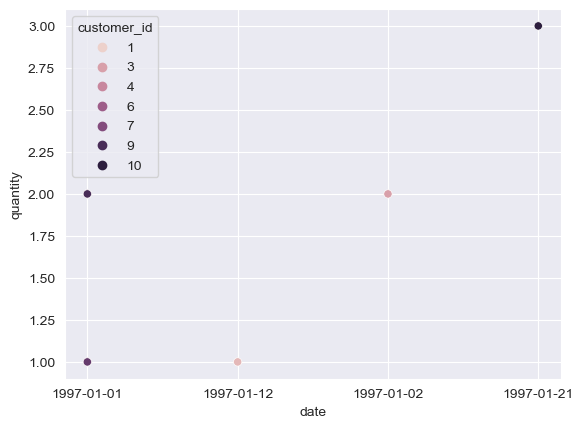

In [71]:
sns.set_style('darkgrid')
sns.scatterplot(data=cost_subset_df, x="date", y='quantity', hue="customer_id")